<a href="https://colab.research.google.com/github/taheranjary/AppGAN/blob/main/ESRGAN_webapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to an unofficial ESRGAN Notebook-webapp: an AI will quadruple your low res image using state of the art Generative-Adversarial-Networks.**

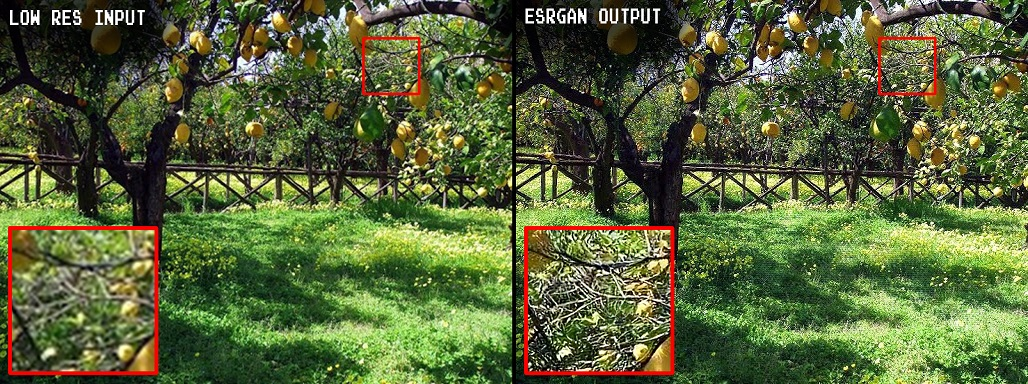

This is an unoffial Colab Notebook specialized for easy inference on a pretrained ESRGAN model

**Step 1:** 

Go to Edit>Notebook settings and make sure you have selected the run time as GPU. Click 'Save'
 
 
**Step 2:**

Run each code cell block below one by one, making sure that each completes before running the next one. The 'run' icon will appear if you hover your mouse over the very top-left corner of each code cell.

When you run the code cell with the command ***runMe()***, an upload prompt will appear asking you to upload the image you want to enhance. Go ahead and browse to the desired image file, select it from your PC and the AI will begin to do its work. After completing the conversion, your enhanced image will automatically download. Note that your orginal and enhanced image file will be deleted from COLAB servers automatically. Do not worry.

You may close this tab once you are done.

**PS:**

If you want to convert more images, just run the ***runME()** code cell again AFTER the previous conversion has completed and your file has been downloaded


**References**

[1]  Xintao Wang, Ke Yu, Shixiang Wu, Jinjin Gu, Yihao Liu, Chao Dong, Yu Qiao, Chen Change Loy  https://github.com/xinntao/ESRGAN

I take no credit for their work aside from tweaking their code to make it easier for others to use.


In [ ]:
!git clone https://github.com/xinntao/ESRGAN
from google.colab import files

# ____________________________________________________________________________________________________________________
# GET MODEL
%cd /content/ESRGAN/models/
file_id = '1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene'
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
!wget -O RRDB_ESRGAN_x4.pth --no-check-certificate "$file_download_link"

# ____________________________________________________________________________________________________________________
## FUNCTION DEFS

# Remove old files
def clear_reset():
  # Remove old LR
  %cd /content/ESRGAN/
  !rm -rf LR
  !mkdir /content/ESRGAN/LR

  # Remove old results
  %cd /content/ESRGAN/
  !rm -rf results
  !mkdir /content/ESRGAN/results

  print('old files removed')
  return True

# Enhance Image
def infer():
  # Upload Image Prompt
  %cd /content/ESRGAN/LR
  uploaded = files.upload()
  filename = next(iter(uploaded))

  # Enhance Image
  print('running inference...')  
  %cd /content/ESRGAN/
  !python test.py
  print('image enhanced!')

  # Download Result
  %cd /content/ESRGAN/results
  filename_4k = filename[:-4] + '_rlt.png'
  files.download(filename_4k)
  return True

# Run Me
def runMe():
  clear_reset()
  infer()


In [ ]:
runMe()

In [ ]:
# %cd /content
# !rm -rf ESRGAN